# Training Experiments Analysis

This notebook combines and visualizes results from the training experiments.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)

## Load and Combine All Results

In [2]:
results_dir = Path('../scripts/training_experiments/results')
csv_files = list(results_dir.glob('*_metrics.csv'))

# Load all CSVs
dfs = []
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    # Extract experiment name from filename
    experiment_name = csv_file.stem.replace('_metrics', '')
    df['experiment'] = experiment_name
    dfs.append(df)

# Combine all dataframes
combined_df = pd.concat(dfs, ignore_index=True)

print(f"Loaded {len(csv_files)} experiment files")
print(f"Total rows: {len(combined_df)}")
print(f"\nExperiments: {combined_df['experiment'].unique().tolist()}")

combined_df.head()

Loaded 8 experiment files
Total rows: 40

Experiments: ['ranker_baseline', 'ranker_both', 'ranker_query_only', 'embedder_baseline', 'ranker_encoder_only', 'embedder_encoder_only', 'embedder_query_only', 'embedder_both']


,epoch,model_type,freeze_encoder,freeze_query,train_loss,val_loss,precision@1,MRR,NDCG@10,score_margin,Recall@1,Recall@3,Recall@5,Recall@10,Recall@20,experiment
0,1,ranker,True,True,0.0,49.106980,0.142857,0.356548,0.525286,0.397179,0.000000,0.160256,0.203297,0.260440,0.481349,ranker_baseline
1,2,ranker,True,True,0.0,50.156133,0.214286,0.497109,0.626172,3.255541,0.113553,0.177656,0.239927,0.321978,0.498016,ranker_baseline
2,3,ranker,True,True,0.0,49.240096,0.285714,0.533333,0.618093,4.836265,0.064103,0.075092,0.184066,0.340781,0.520360,ranker_baseline
3,4,ranker,True,True,0.0,49.421636,0.428571,0.602381,0.686751,4.749229,0.025641,0.102564,0.228938,0.252747,0.523657,ranker_baseline
4,5,ranker,True,True,0.0,49.002120,0.285714,0.490079,0.606738,2.994325,0.010989,0.113553,0.177656,0.270696,0.454426,ranker_baseline


## Summary Statistics

In [ ]:
# Get best epoch for each experiment based on validation loss
best_epochs = combined_df.loc[combined_df.groupby('experiment')['val_loss'].idxmin()]

# Select key metrics
metrics_cols = ['experiment', 'epoch', 'val_loss', 'precision@1', 'MRR', 'NDCG@10',
                'Recall@1', 'Recall@5', 'Recall@10']
summary = best_epochs[metrics_cols].sort_values('val_loss')

print("Best Performance (by validation loss):")
summary

Best Performance (by validation loss):


,experiment,epoch,val_loss,precision@1,MRR,NDCG@10,Recall@1,Recall@5,Recall@10
9,ranker_both,5,0.254594,0.928571,0.964286,0.939874,0.268895,0.683394,0.788828
24,ranker_encoder_only,5,0.315108,0.642857,0.784014,0.835744,0.261203,0.619078,0.748962
26,embedder_encoder_only,2,0.645740,0.928571,0.940476,0.916503,0.268040,0.564377,0.793590
39,embedder_both,5,1.434946,0.714286,0.827381,0.828999,0.076923,0.402961,0.519292
33,embedder_query_only,4,1.501795,0.642857,0.782738,0.792516,0.112179,0.413217,0.506471
17,embedder_baseline,3,2.037949,0.500000,0.680952,0.716639,0.049451,0.315781,0.443010
14,ranker_query_only,5,47.147909,0.142857,0.484524,0.605163,0.076923,0.184066,0.283516
4,ranker_baseline,5,49.002120,0.285714,0.490079,0.606738,0.010989,0.177656,0.270696


## Validation Loss Over Epochs

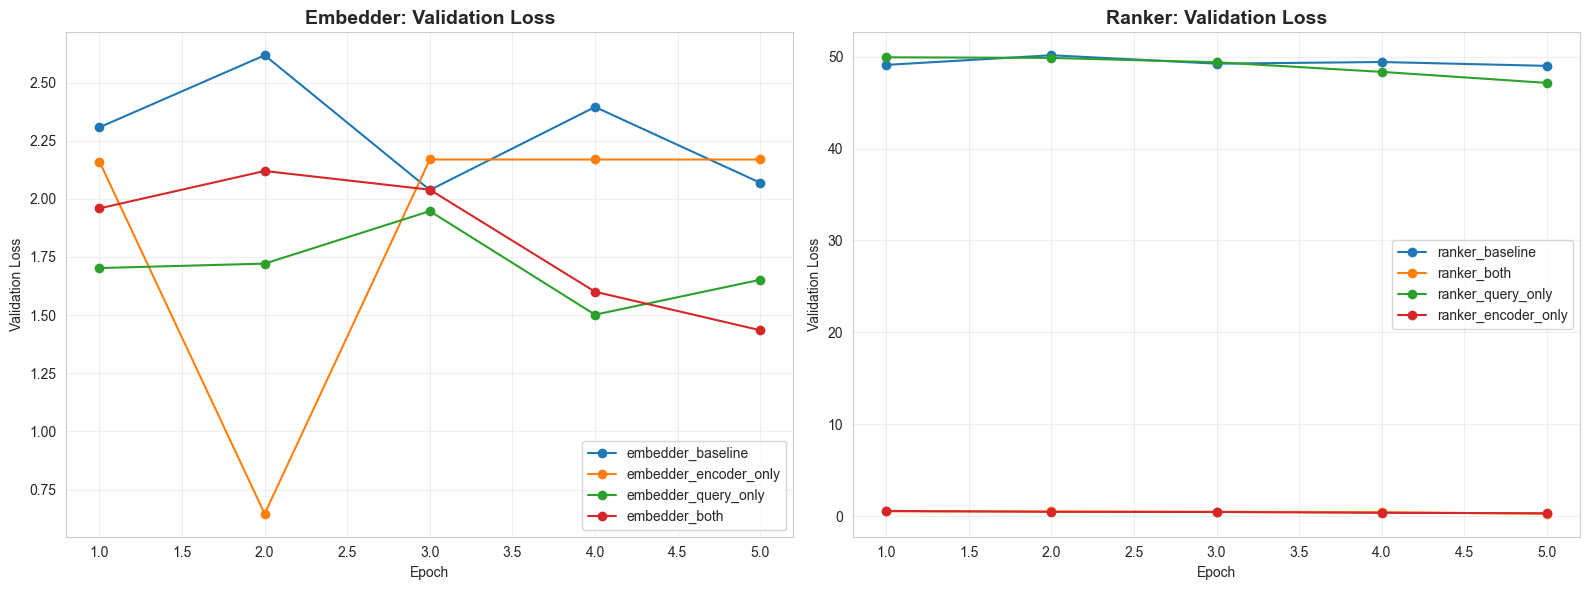

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Embedder experiments
embedder_df = combined_df[combined_df['model_type'] == 'embedder']
for exp in embedder_df['experiment'].unique():
    data = embedder_df[embedder_df['experiment'] == exp]
    axes[0].plot(data['epoch'], data['val_loss'], marker='o', label=exp)
axes[0].set_title('Embedder: Validation Loss', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Validation Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Ranker experiments
ranker_df = combined_df[combined_df['model_type'] == 'ranker']
for exp in ranker_df['experiment'].unique():
    data = ranker_df[ranker_df['experiment'] == exp]
    axes[1].plot(data['epoch'], data['val_loss'], marker='o', label=exp)
axes[1].set_title('Ranker: Validation Loss', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Validation Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Recall Metrics Comparison

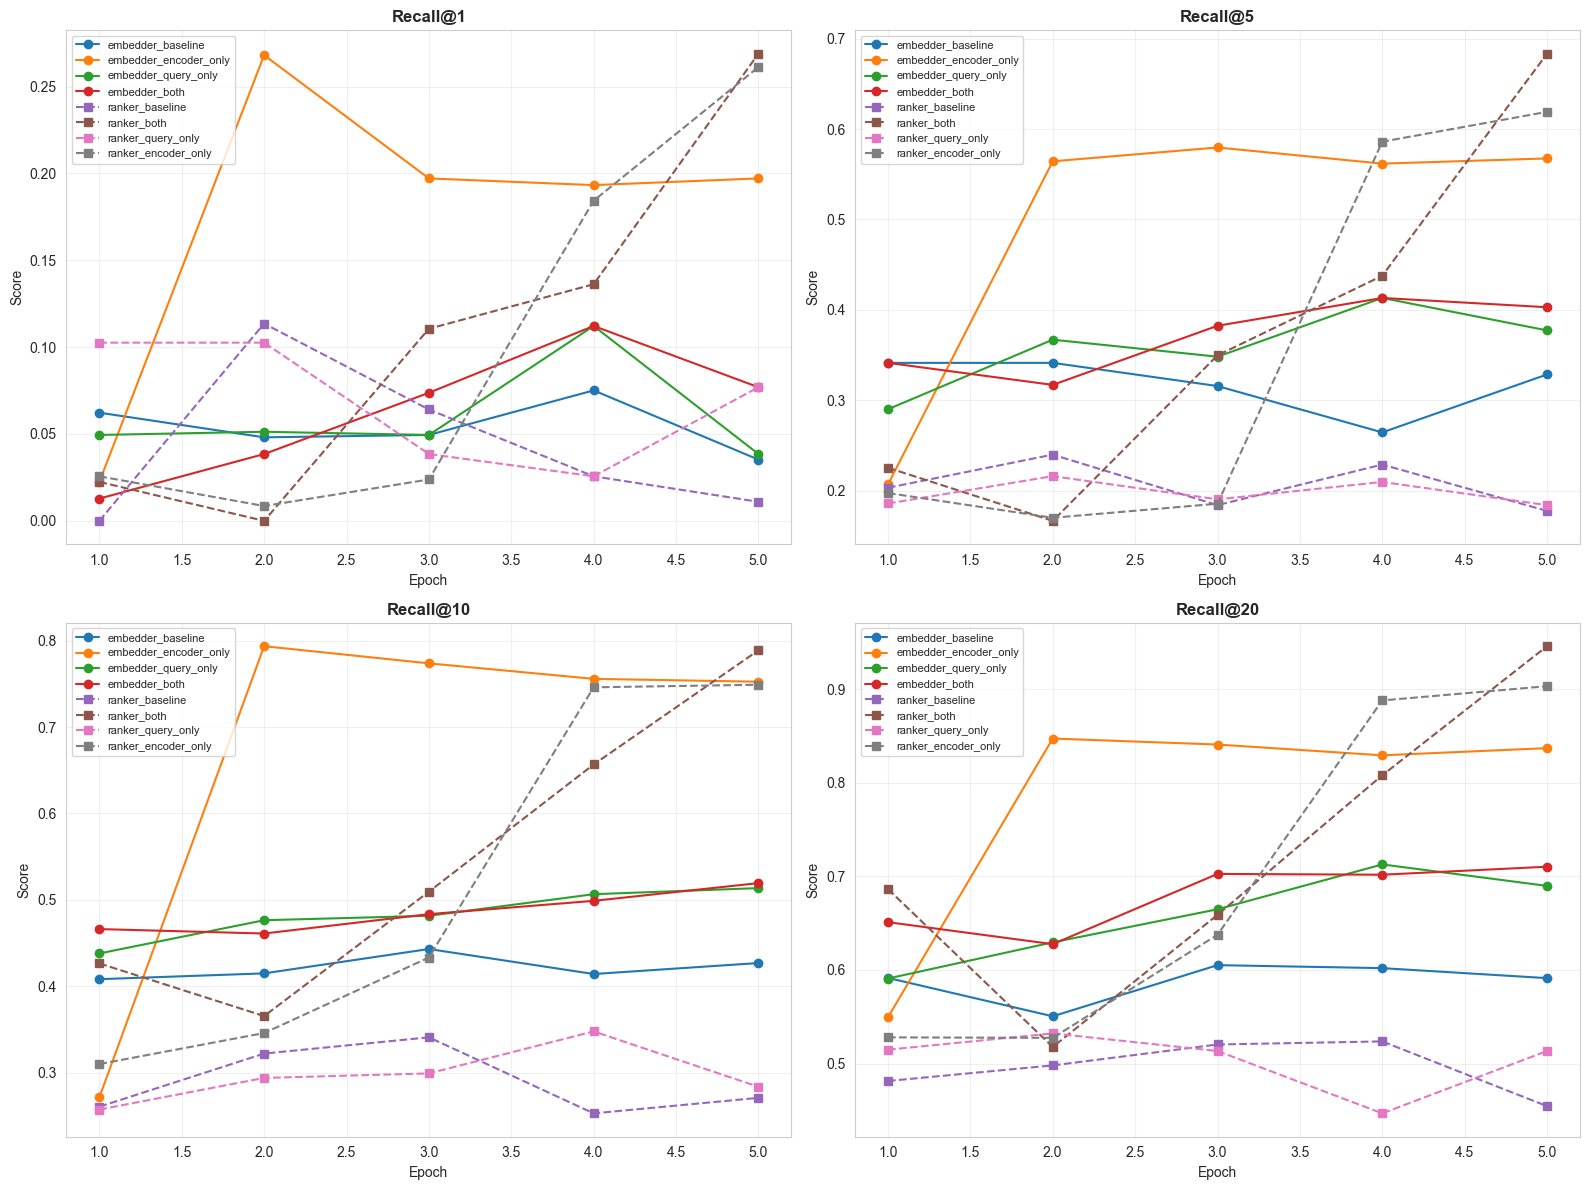

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

recall_metrics = ['Recall@1', 'Recall@5', 'Recall@10', 'Recall@20']

for idx, metric in enumerate(recall_metrics):
    ax = axes[idx // 2, idx % 2]

    # Embedder
    for exp in embedder_df['experiment'].unique():
        data = embedder_df[embedder_df['experiment'] == exp]
        ax.plot(data['epoch'], data[metric], marker='o', linestyle='-', label=f'{exp}')

    # Ranker
    for exp in ranker_df['experiment'].unique():
        data = ranker_df[ranker_df['experiment'] == exp]
        ax.plot(data['epoch'], data[metric], marker='s', linestyle='--', label=f'{exp}')

    ax.set_title(metric, fontsize=12, fontweight='bold')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Score')
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## MRR and NDCG@10 Comparison

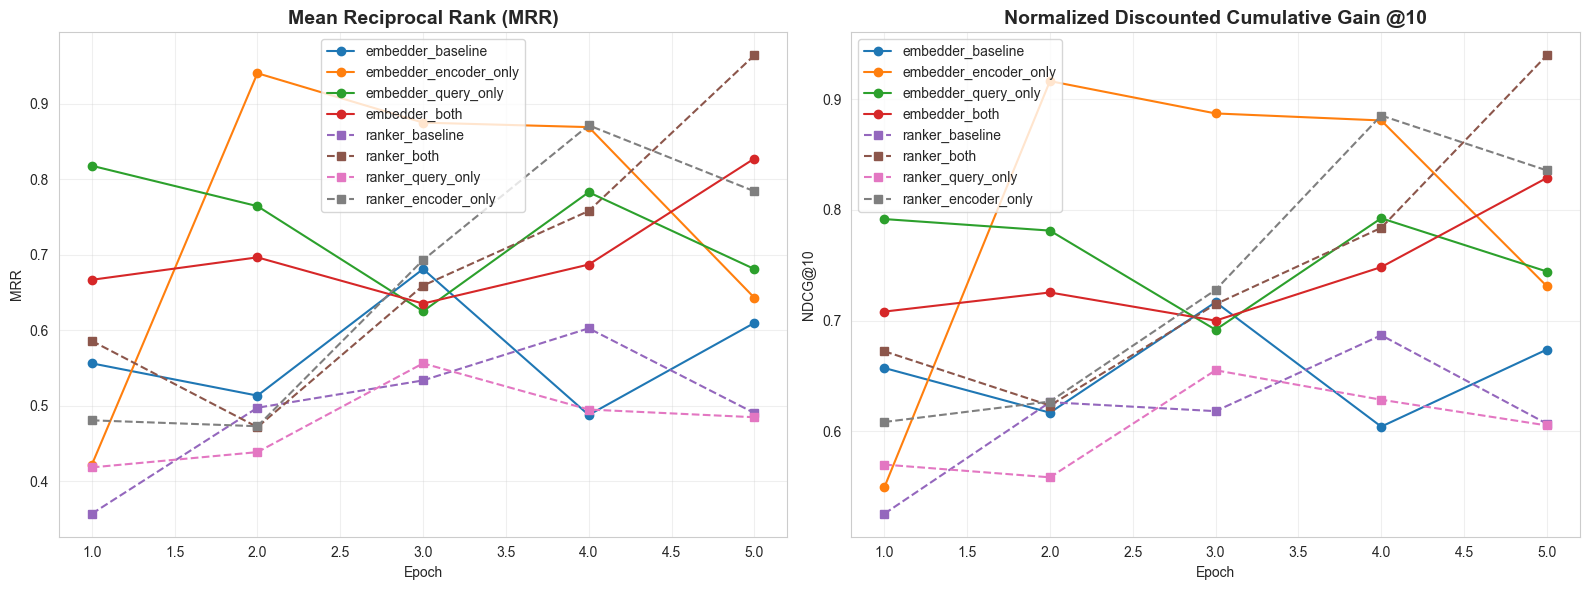

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# MRR
for exp in embedder_df['experiment'].unique():
    data = embedder_df[embedder_df['experiment'] == exp]
    axes[0].plot(data['epoch'], data['MRR'], marker='o', linestyle='-', label=exp)
for exp in ranker_df['experiment'].unique():
    data = ranker_df[ranker_df['experiment'] == exp]
    axes[0].plot(data['epoch'], data['MRR'], marker='s', linestyle='--', label=exp)
axes[0].set_title('Mean Reciprocal Rank (MRR)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('MRR')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# NDCG@10
for exp in embedder_df['experiment'].unique():
    data = embedder_df[embedder_df['experiment'] == exp]
    axes[1].plot(data['epoch'], data['NDCG@10'], marker='o', linestyle='-', label=exp)
for exp in ranker_df['experiment'].unique():
    data = ranker_df[ranker_df['experiment'] == exp]
    axes[1].plot(data['epoch'], data['NDCG@10'], marker='s', linestyle='--', label=exp)
axes[1].set_title('Normalized Discounted Cumulative Gain @10', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('NDCG@10')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Best Performance Comparison (Bar Chart)

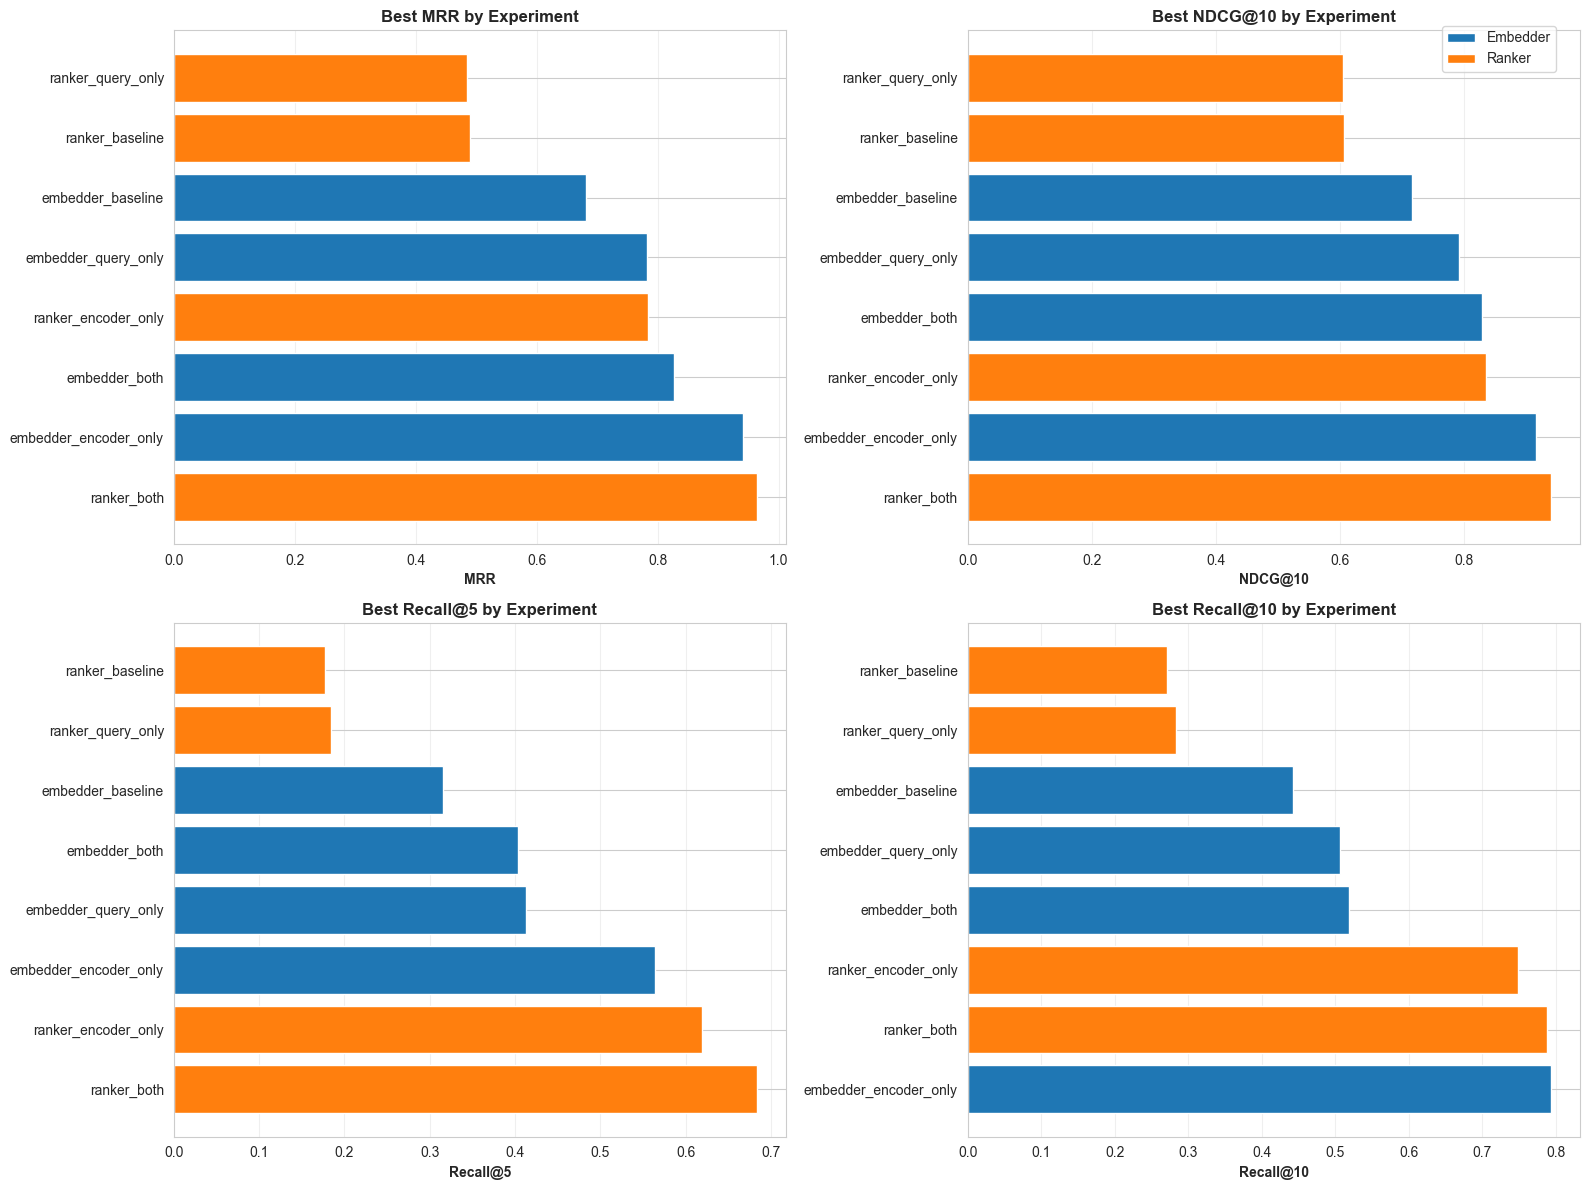

In [ ]:
# Create comparison of best epochs
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics_to_compare = ['MRR', 'NDCG@10', 'Recall@5', 'Recall@10']

for idx, metric in enumerate(metrics_to_compare):
    ax = axes[idx // 2, idx % 2]

    data = best_epochs.sort_values(metric, ascending=False)

    # Color by model type
    colors = ['#1f77b4' if 'embedder' in exp else '#ff7f0e' for exp in data['experiment']]

    ax.barh(data['experiment'], data[metric], color=colors)
    ax.set_xlabel(metric, fontweight='bold')
    ax.set_title(f'Best {metric} by Experiment', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='x')

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#1f77b4', label='Embedder'),
                   Patch(facecolor='#ff7f0e', label='Ranker')]
fig.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.98, 0.98))

plt.tight_layout()
plt.show()

## Training Configuration Analysis

In [ ]:
# Analyze the effect of freezing encoder vs query
config_summary = best_epochs[['experiment', 'model_type', 'freeze_encoder', 'freeze_query',
                               'MRR', 'NDCG@10', 'Recall@10', 'val_loss']].copy()

# Create configuration label
def config_label(row):
    if row['freeze_encoder'] and row['freeze_query']:
        return 'baseline (both frozen)'
    elif not row['freeze_encoder'] and row['freeze_query']:
        return 'encoder_only'
    elif row['freeze_encoder'] and not row['freeze_query']:
        return 'query_only'
    else:
        return 'both'

config_summary['config'] = config_summary.apply(config_label, axis=1)

print("\nPerformance by Configuration:")
config_summary[['model_type', 'config', 'MRR', 'NDCG@10', 'Recall@10', 'val_loss']].sort_values(['model_type', 'MRR'], ascending=[True, False])


Performance by Configuration:


,model_type,config,MRR,NDCG@10,Recall@10,val_loss
26,embedder,encoder_only,0.940476,0.916503,0.793590,0.645740
39,embedder,both,0.827381,0.828999,0.519292,1.434946
33,embedder,query_only,0.782738,0.792516,0.506471,1.501795
17,embedder,baseline (both frozen),0.680952,0.716639,0.443010,2.037949
9,ranker,both,0.964286,0.939874,0.788828,0.254594
24,ranker,encoder_only,0.784014,0.835744,0.748962,0.315108
4,ranker,baseline (both frozen),0.490079,0.606738,0.270696,49.002120
14,ranker,query_only,0.484524,0.605163,0.283516,47.147909


## Save Combined Results

In [9]:
# Save combined results
output_path = results_dir / 'combined_results.csv'
combined_df.to_csv(output_path, index=False)
print(f"Combined results saved to: {output_path}")

# Save best epochs summary
summary_path = results_dir / 'best_performance_summary.csv'
best_epochs.to_csv(summary_path, index=False)
print(f"Best performance summary saved to: {summary_path}")

Combined results saved to: ../scripts/training_experiments/results/combined_results.csv
Best performance summary saved to: ../scripts/training_experiments/results/best_performance_summary.csv
